In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (7, 5)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,auc,roc_auc_score,accuracy_score,roc_curve
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [2]:
df = pd.read_csv("online_shoppers_intention.csv")

In [3]:
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
df.shape

(12330, 18)

In [5]:
def value_counts(df):
    cat_cols = df.select_dtypes(exclude=["int64","float64"]).columns
    i=0;
    for var in cat_cols:
        print("\t",var)
        print("Totally there are {} unique values in {}".format(df[var].nunique(),var))
        print(df[var].value_counts())
        print("*"*60)
value_counts(df)

	 Month
Totally there are 10 unique values in Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: Month, dtype: int64
************************************************************
	 VisitorType
Totally there are 3 unique values in VisitorType
Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64
************************************************************
	 Weekend
Totally there are 2 unique values in Weekend
False    9462
True     2868
Name: Weekend, dtype: int64
************************************************************
	 Revenue
Totally there are 2 unique values in Revenue
False    10422
True      1908
Name: Revenue, dtype: int64
************************************************************


In [6]:
df["SpecialDay"] = df["SpecialDay"].astype("object")

In [7]:
df.shape

(12330, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null object
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(2

In [10]:
# list of numerical variables
num_vars = df.select_dtypes(exclude=['object','bool']).columns

print('Number of numerical variables: ', len(num_vars))

# visualize the numerical variables
df[num_vars].head()

Number of numerical variables:  13


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,OperatingSystems,Browser,Region,TrafficType
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,1,1,1,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,2,2,1,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,4,1,9,3
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,3,2,2,4
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,3,3,1,4


In [13]:
#  list of discrete variables
discrete_vars = [var for var in num_vars if len(df[var].unique())<20]

In [14]:
# list of continuous variables
cont_vars = [var for var in num_vars if var not in discrete_vars]

print('Number of continuous variables: ', len(cont_vars))

df[cont_vars].head()

Number of continuous variables:  9


,Administrative,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,TrafficType
0,0,0.0,0.0,1,0.000000,0.20,0.20,0.0,1
1,0,0.0,0.0,2,64.000000,0.00,0.10,0.0,2
2,0,0.0,0.0,1,0.000000,0.20,0.20,0.0,3
3,0,0.0,0.0,2,2.666667,0.05,0.14,0.0,4
4,0,0.0,0.0,10,627.500000,0.02,0.05,0.0,4


************************************************************


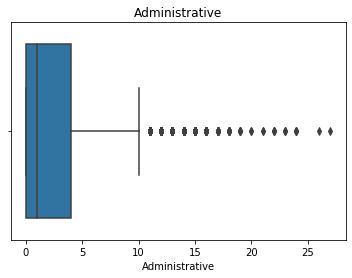

************************************************************


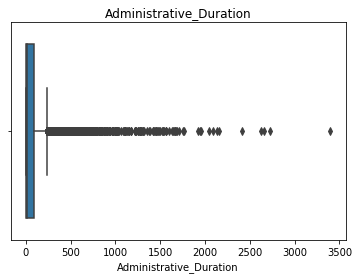

************************************************************


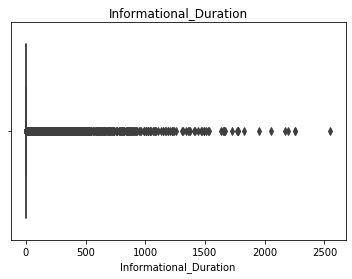

************************************************************


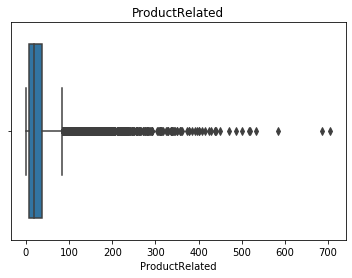

************************************************************


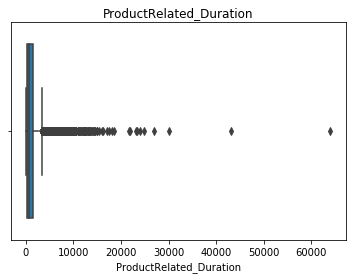

************************************************************


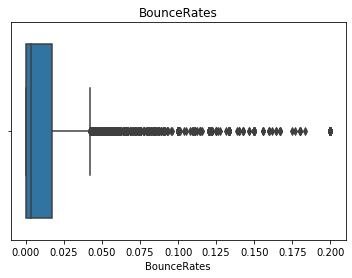

************************************************************


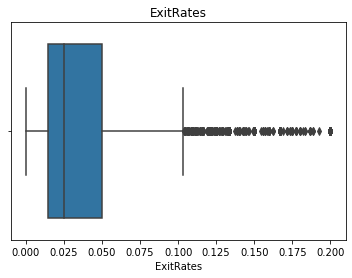

************************************************************


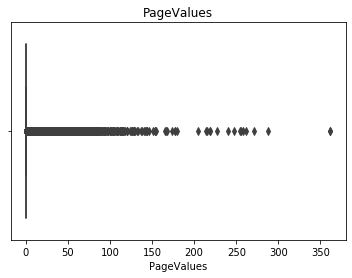

************************************************************


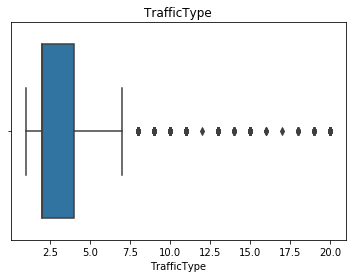

In [15]:
# Let's go ahead and analyse the distributions of these variables
def analyse_continous(df, var):
    df = df.copy()
    #sns.distplot(np.sqrt(df[var]))
    sns.boxplot(df[var])
    plt.xlabel(var)
    plt.title(var)
    print("*"*60)
    plt.show()
    
for var in cont_vars:
    analyse_continous(df, var)

##### EDA

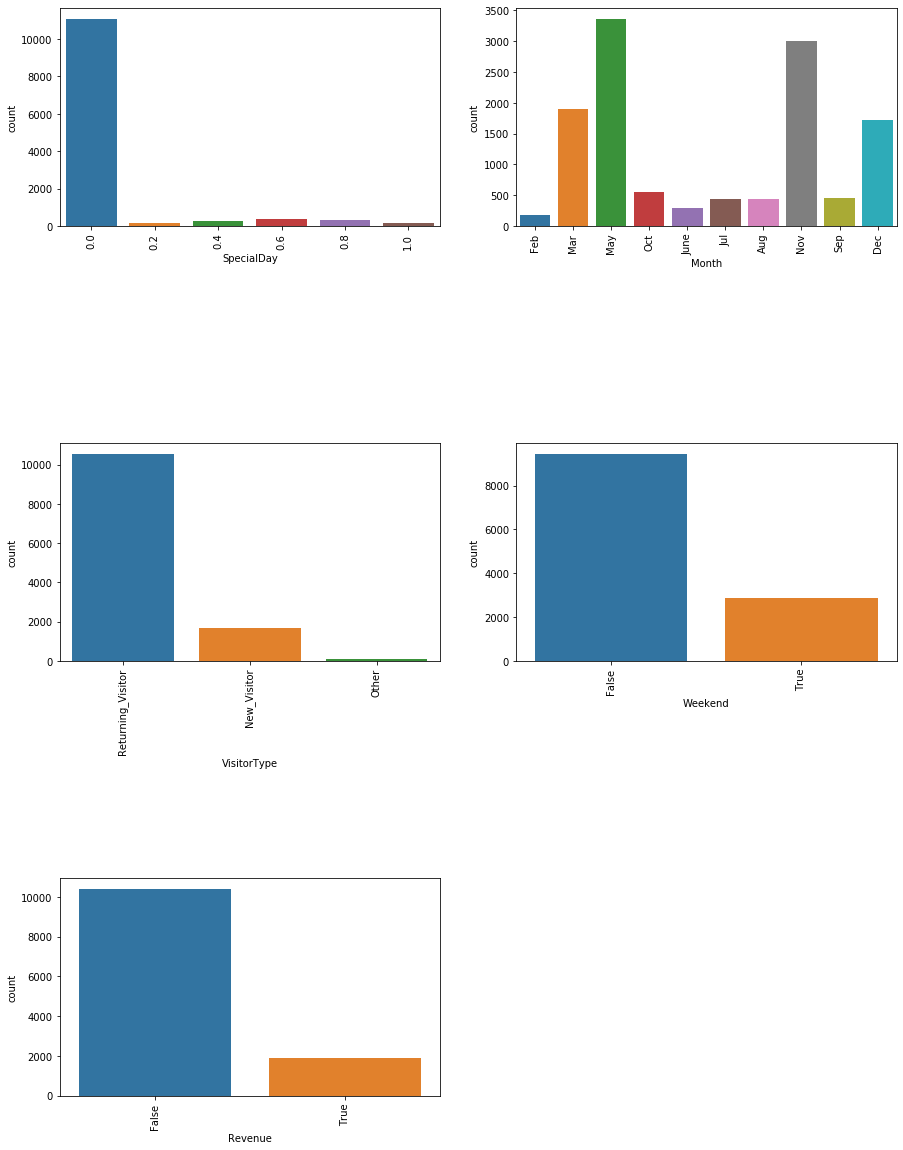

In [13]:
cat_cols=df.select_dtypes(include=["object","bool"])
fig=plt.subplots(figsize=(15,20))
for i, j in enumerate(cat_cols):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    
plt.show()

Text(0.5, 1.0, 'SpecialDay/Revenue')

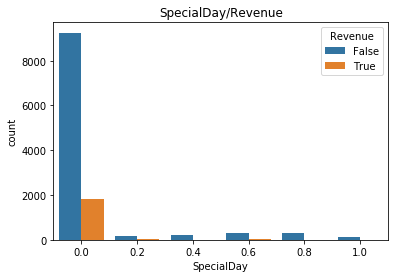

In [14]:
sns.countplot("SpecialDay",data =df,hue="Revenue")
plt.title("SpecialDay/Revenue")

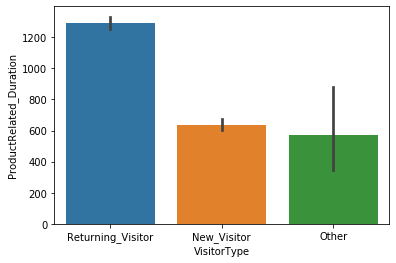

In [15]:
sns.barplot(x="VisitorType",y="ProductRelated_Duration",data=df)

Text(0.5, 1.0, 'Month')

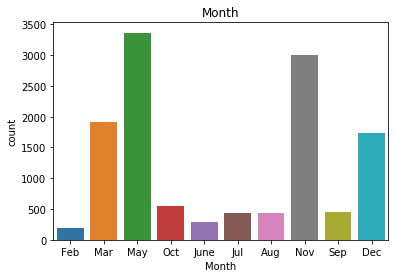

In [16]:
sns.countplot("Month",data=df)
plt.title("Month")

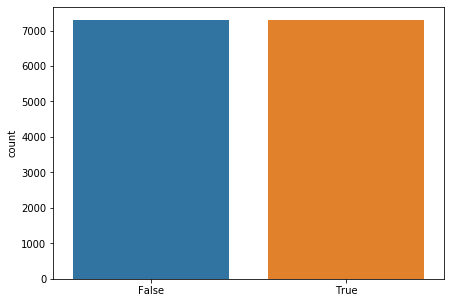

In [334]:
sns.countplot(y_train_res)

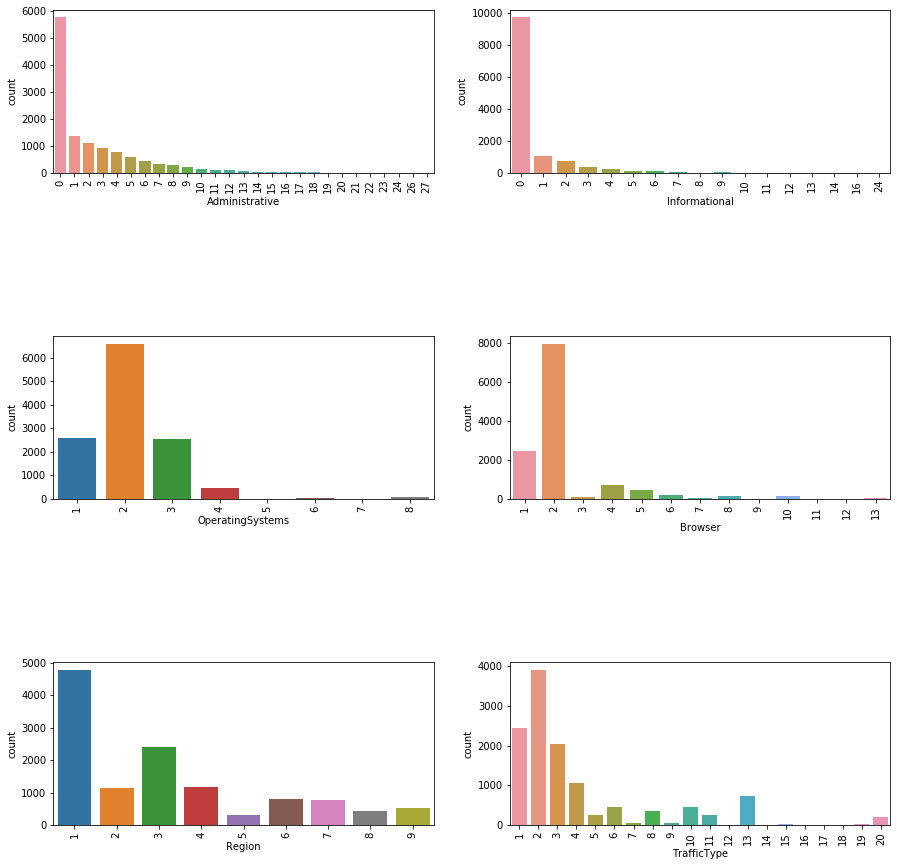

In [382]:
l = ["Administrative","Informational","OperatingSystems","Browser","Region","TrafficType"]
# for var in l:
#     df[var] = df[var].astype("object")
fig=plt.subplots(figsize=(15,15))
for i, j in enumerate(l):
    plt.subplot(3, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    sns.countplot(x=j,data = df)
    plt.xticks(rotation=90)
    
plt.show()

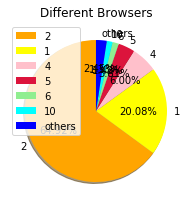

In [383]:

# plotting a pie chart for browsers
size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1","4","5","6","10","others"

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%', startangle = 90)
plt.title('Different Browsers', fontsize = 12)
plt.axis('off')
plt.legend()
plt.show()

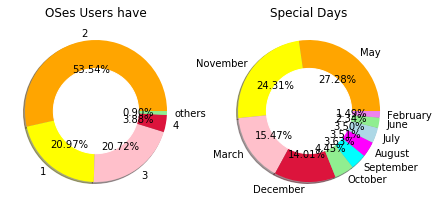

In [384]:
# creating a donut chart for the months variations'

# plotting a pie chart for different number of OSes users have.

size = [6601, 2585, 2555, 478, 111]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen']
labels = "2", "1","3","4","others"
explode = [0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('OSes Users have', fontsize = 12)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')

# plotting a pie chart for share of special days

size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Special Days', fontsize = 12)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')

plt.show()

In [18]:
df["Month"].value_counts()

6    3364
7    2998
5    1907
1    1727
8     549
9     448
0     433
3     432
4     288
2     184
Name: Month, dtype: int64

#### Special day

In [19]:
df["SpecialDay"].value_counts()

0    11079
3      351
4      325
2      243
1      178
5      154
Name: SpecialDay, dtype: int64

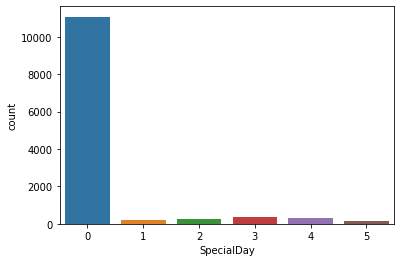

In [20]:
sns.countplot(df["SpecialDay"])


Text(0.5, 1.0, 'SpecialDay/Revenue')

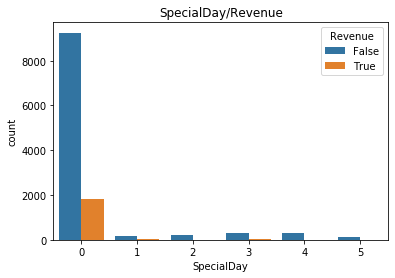

In [21]:
sns.countplot(x="SpecialDay",data=df,hue="Revenue")
plt.title("SpecialDay/Revenue")

Text(0.5, 1.0, 'SpecialDay/Weekend')

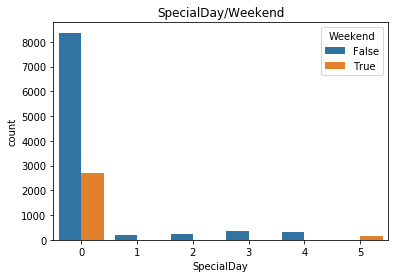

In [22]:
sns.countplot(x="SpecialDay",data=df,hue="Weekend")
plt.title("SpecialDay/Weekend")

##### User type Analysis

(-1.25, 1.25, -1.25, 1.25)

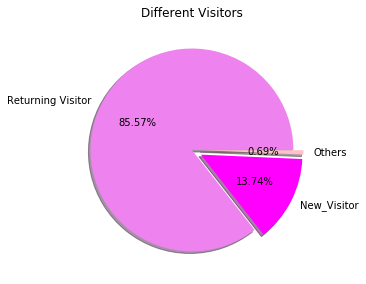

In [390]:
# plotting a pie chart for visitors
plt.figure(figsize=(10,5))
size = [10551, 1694, 85]
colors = ['violet', 'magenta', 'pink']
labels = "Returning Visitor", "New_Visitor", "Others"
explode = [0, 0.1, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Different Visitors', fontsize = 12)
plt.axis('off')

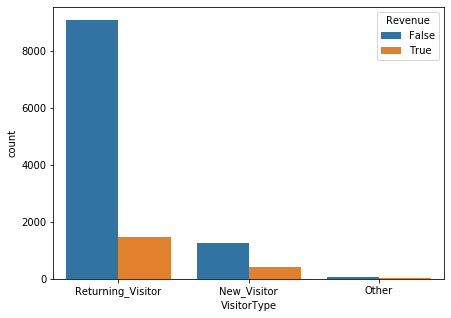

In [391]:
sns.countplot(x="VisitorType",data=df,hue="Revenue")

Text(0.5, 1.0, 'VisitorType/Revenue')

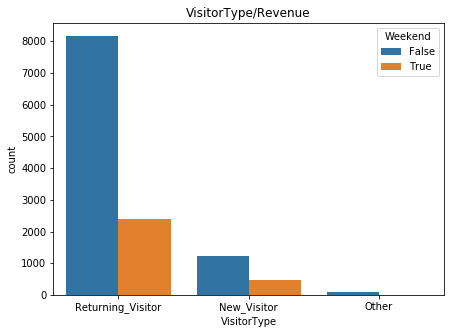

In [392]:
sns.countplot(x="VisitorType",data=df,hue="Weekend")
plt.title("VisitorType/Revenue")

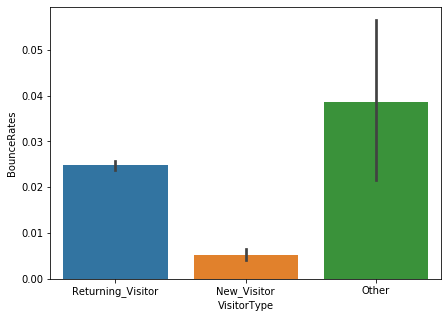

In [393]:
sns.barplot(x="VisitorType",y="BounceRates",data=df)

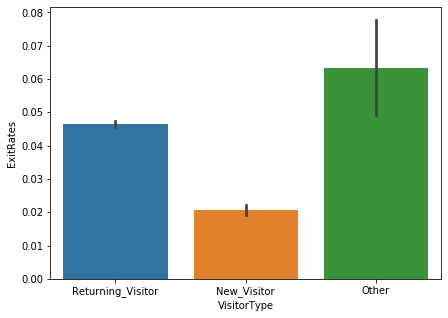

In [394]:
sns.barplot(x="VisitorType",y="ExitRates",data=df)

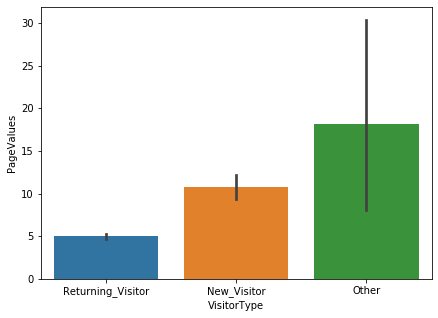

In [395]:
sns.barplot(x="VisitorType",y="PageValues",data=df)

<BarContainer object of 10551 artists>

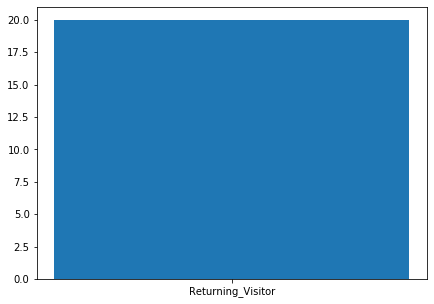

In [397]:
plt.bar(df[df["VisitorType"]=="Returning_Visitor"]["VisitorType"],
        df[df["VisitorType"]=="Returning_Visitor"]["TrafficType"])

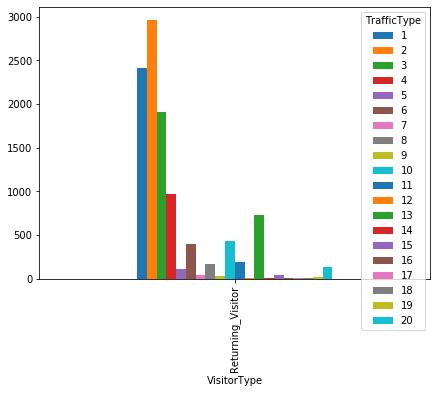

In [398]:
ct = pd.crosstab(df[df["VisitorType"]=="Returning_Visitor"]["VisitorType"],
        df[df["VisitorType"]=="Returning_Visitor"]["TrafficType"])
ct.plot.bar()

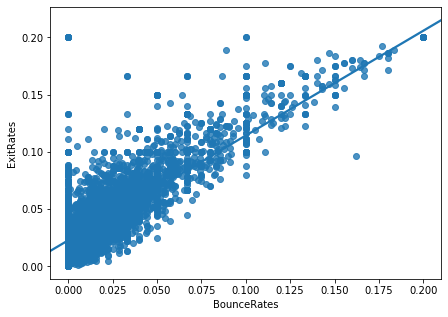

In [399]:
sns.regplot(x="BounceRates",y="ExitRates",data=df)

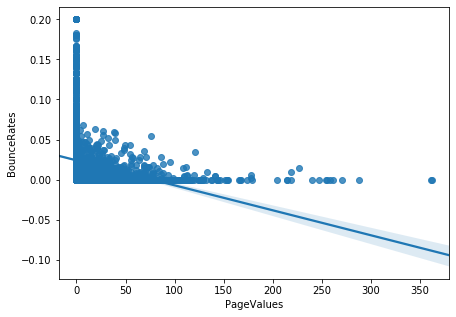

In [400]:
sns.regplot(x="PageValues",y="BounceRates",data=df)

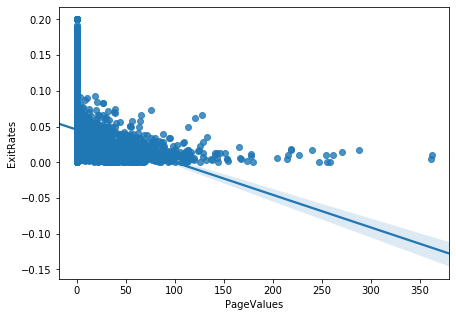

In [401]:
sns.regplot(x="PageValues",y="ExitRates",data=df)

Text(0.5, 1.0, 'VisitorType/Administrative_Duration')

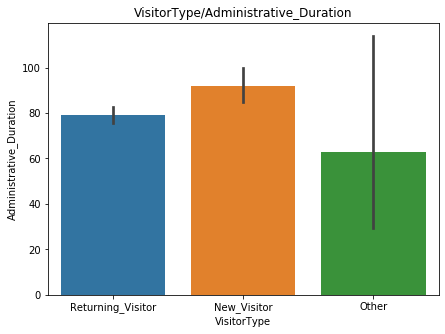

In [402]:
sns.barplot(x="VisitorType",y="Administrative_Duration",data=df)
plt.title("VisitorType/Administrative_Duration")

Text(0.5, 1.0, 'VisitorType/Informational_Duration')

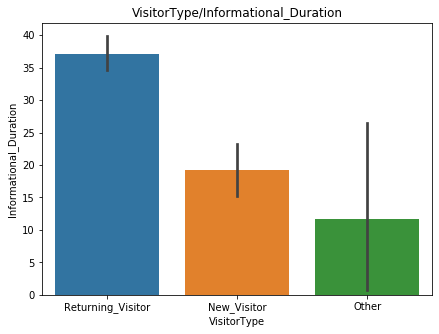

In [403]:
sns.barplot(x="VisitorType",y="Informational_Duration",data=df)
plt.title("VisitorType/Informational_Duration")

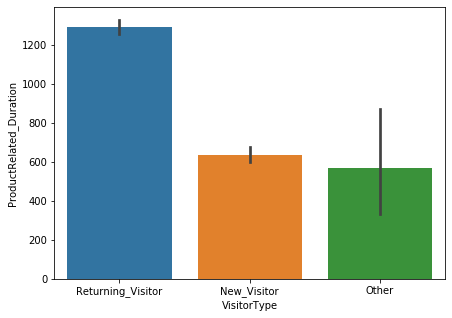

In [404]:
sns.barplot(x="VisitorType",y="ProductRelated_Duration",data=df)

In [405]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [16]:
df = df[df["VisitorType"]!="Other"]

In [17]:
df["Weekend"] = df["Weekend"].map({True:1,False:0})
df["Revenue"] = df["Revenue"].map({True:1,False:0})

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12245 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12245 non-null int64
Administrative_Duration    12245 non-null float64
Informational              12245 non-null int64
Informational_Duration     12245 non-null float64
ProductRelated             12245 non-null int64
ProductRelated_Duration    12245 non-null float64
BounceRates                12245 non-null float64
ExitRates                  12245 non-null float64
PageValues                 12245 non-null float64
SpecialDay                 12245 non-null object
Month                      12245 non-null object
OperatingSystems           12245 non-null int64
Browser                    12245 non-null int64
Region                     12245 non-null int64
TrafficType                12245 non-null int64
VisitorType                12245 non-null object
Weekend                    12245 non-null int64
Revenue                    12245 non-null int64
dtypes: floa

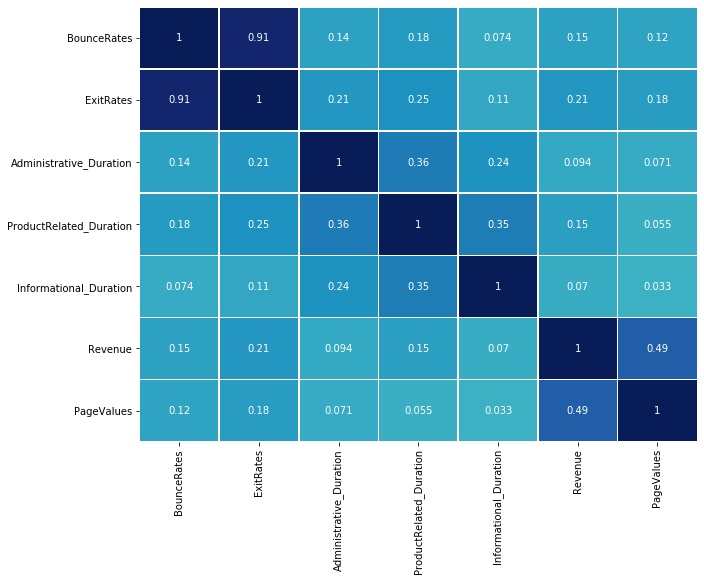

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(np.abs(df[["BounceRates","ExitRates","Administrative_Duration",
                      "ProductRelated_Duration","Informational_Duration","Revenue",
                      "PageValues"]].corr()),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

In [20]:
cols = np.abs(df.corr()).nlargest(10, 'Revenue')['Revenue'].index
cols

Index(['Revenue', 'PageValues', 'ExitRates', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'Administrative',
       'Informational', 'Administrative_Duration', 'Informational_Duration'],
      dtype='object')

In [92]:

stats.ttest_ind(df[(df["Revenue"]==0) & (df["PageValues"]!=0)]["PageValues"],
               df[(df["Revenue"]==1 )& (df["PageValues"]!=0)]["PageValues"])

Ttest_indResult(statistic=-13.926709672879454, pvalue=1.236753414668297e-42)

In [93]:
import scipy.stats as stats

In [94]:
numerical_vars = df.select_dtypes(exclude=["object","bool"]).columns

In [95]:
#numerical_vars = ["Administrative_Duration","Administrative_Duration","Informational_Duration","ProductRelated_Duration",
                 # "PageValues",'BounceRates',"ExitRates"]
for var in numerical_vars:
    print("Performing Independent ttest for {} ".format(var))
    print(stats.kruskal(df[df["Revenue"]==1][var],df[df["Revenue"]==0][var]))
    print("*"*60)

Performing Independent ttest for Administrative 
KruskalResult(statistic=344.05847205980024, pvalue=8.337249016188077e-77)
************************************************************
Performing Independent ttest for Administrative_Duration 
KruskalResult(statistic=327.26557417275774, pvalue=3.787532408615716e-73)
************************************************************
Performing Independent ttest for Informational 
KruskalResult(statistic=160.15518360895504, pvalue=1.0465083239339573e-36)
************************************************************
Performing Independent ttest for Informational_Duration 
KruskalResult(statistic=154.97881547253897, pvalue=1.415217702108796e-35)
************************************************************
Performing Independent ttest for ProductRelated 
KruskalResult(statistic=478.3098832767256, pvalue=4.98322654121723e-106)
************************************************************
Performing Independent ttest for ProductRelated_Duration 
Kruska

In [96]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [97]:
Chi_square = []
features = ['VisitorType','Weekend','SpecialDay','Month',"Administrative","Informational","OperatingSystems","Browser","Region","TrafficType"]
for var in features:
    a,pvalue,c,d = stats.chi2_contingency(pd.crosstab(df[var],df['Revenue']))
    print("Performing Independent chi_square test for ",var)
    print('P-value :',pvalue)
    print("*"*60)
    Chi_square.append(pvalue)
chi_contigency = pd.DataFrame()
chi_contigency["Features"] = features
chi_contigency["Chi_square_values"] = Chi_square
chi_contigency

Performing Independent chi_square test for  VisitorType
P-value : 5.909537874047138e-31
************************************************************
Performing Independent chi_square test for  Weekend
P-value : 0.0010534752899271954
************************************************************
Performing Independent chi_square test for  SpecialDay
P-value : 4.040357397810531e-19
************************************************************
Performing Independent chi_square test for  Month
P-value : 2.1999413070969144e-78
************************************************************
Performing Independent chi_square test for  Administrative
P-value : 6.6339136309417435e-71
************************************************************
Performing Independent chi_square test for  Informational
P-value : 2.0428392786136319e-29
************************************************************
Performing Independent chi_square test for  OperatingSystems
P-value : 4.795114600807217e-13
****************

,Features,Chi_square_values
0,VisitorType,5.909538e-31
1,Weekend,1.053475e-03
2,SpecialDay,4.040357e-19
3,Month,2.199941e-78
4,Administrative,6.633914e-71
5,Informational,2.042839e-29
6,OperatingSystems,4.795115e-13
7,Browser,3.555431e-02
8,Region,4.033629e-01
9,TrafficType,8.063364e-67


- H0 - There is a association between categories
- H1 - No association between categories
- Some are having association between variables and some are not.

In [98]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,Feb,3,3,1,4,Returning_Visitor,1,0


In [16]:
df_1 = pd.get_dummies(df)

In [21]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ["Month","VisitorType"]
le  = LabelEncoder()
for var in cat_cols:
    df[var] = le.fit_transform(df[var])

In [22]:
df.shape

(12245, 18)

In [17]:
df=df_1

In [23]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,2,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,2,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,2,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,2,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,2,3,3,1,4,1,1,0


In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = StandardScaler()
mm = MinMaxScaler()

In [27]:
X = df.drop(["Revenue"],axis=1)
y = df["Revenue"]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

##### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_log = lr.predict(X_test) 
print(classification_report(y_test,pd.Series(y_pred_log)))
print("Accuracy on training set: {:.3f}".format(lr.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      3115
           1       0.72      0.38      0.49       559

    accuracy                           0.88      3674
   macro avg       0.81      0.68      0.71      3674
weighted avg       0.87      0.88      0.87      3674

Accuracy on training set: 0.885
Accuracy on test set: 0.882


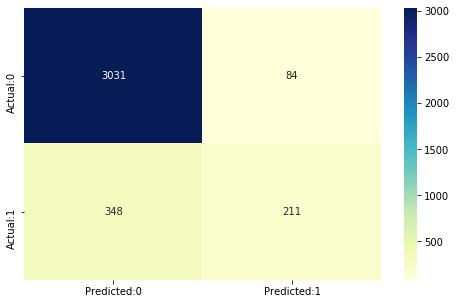

In [31]:
cm=confusion_matrix(y_test,y_pred_log)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


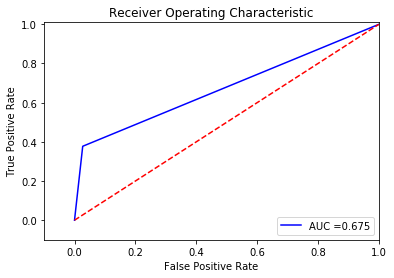

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC =%0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

##### Linear SVC

In [149]:
svm = LinearSVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test) 
print(classification_report(y_test,pd.Series(y_pred_svm)))
print("Accuracy on training set: {:.3f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3115
           1       0.74      0.34      0.47       559

    accuracy                           0.88      3674
   macro avg       0.82      0.66      0.70      3674
weighted avg       0.87      0.88      0.86      3674

Accuracy on training set: 0.881
Accuracy on test set: 0.882


##### Support Vector Machines

In [150]:
svm_nl = SVC()
svm_nl.fit(X_train,y_train)
y_pred_svm = svm_nl.predict(X_test) 
print(classification_report(y_test,pd.Series(y_pred_svm)))
print("Accuracy on training set: {:.3f}".format(svm_nl.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svm_nl.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3115
           1       0.72      0.49      0.58       559

    accuracy                           0.89      3674
   macro avg       0.82      0.73      0.76      3674
weighted avg       0.88      0.89      0.88      3674

Accuracy on training set: 0.904
Accuracy on test set: 0.893


##### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test) 
print(classification_report(y_test,pd.Series(y_pred_tree)))
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3115
           1       0.55      0.60      0.57       559

    accuracy                           0.86      3674
   macro avg       0.74      0.76      0.75      3674
weighted avg       0.87      0.86      0.87      3674

Accuracy on training set: 1.000
Accuracy on test set: 0.863


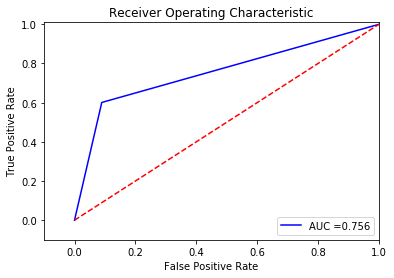

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_tree)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC =%0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

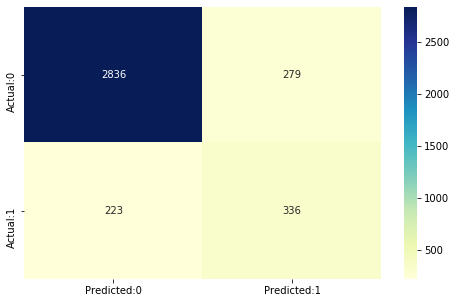

In [35]:
cm=confusion_matrix(y_test,y_pred_tree)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")


###### Random Forest Classifier

In [36]:
RF=RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      3115
           1       0.69      0.60      0.64       559

    accuracy                           0.90      3674
   macro avg       0.81      0.78      0.79      3674
weighted avg       0.89      0.90      0.89      3674



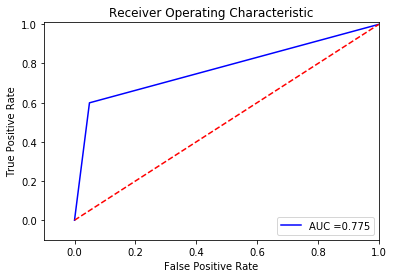

In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC =%0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

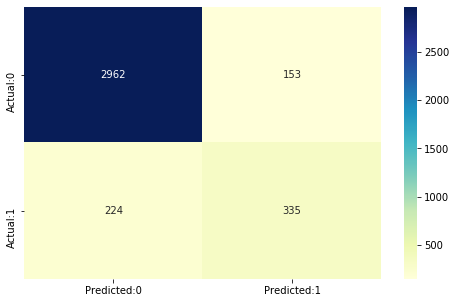

In [38]:
cm=confusion_matrix(y_test,y_pred_RF)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

##### cross validation

In [39]:
import sklearn.model_selection as model_selection
LR= LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
models = []
models.append(('Logistic Regression',LR))
#models.append(('Linear SVM',svm))
models.append(('DT',DT))
models.append(('RandomForest',RF))
#models.append(('SVM',svm_nl))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,X,y,cv=kfold,scoring='f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(cv_results),np.std(cv_results,ddof=1)))

Logistic Regression: 0.862707 (0.005574)
DT: 0.863253 (0.005594)
RandomForest: 0.895966 (0.005110)


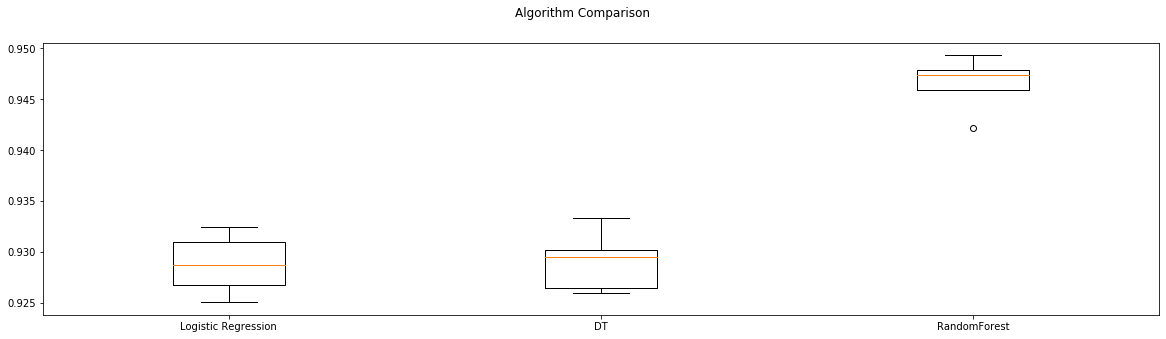

In [40]:
#boxplot algorithm comparison
fig = plt.figure(figsize=(20,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##### CROSS VALIDATION SMOTE

In [41]:

from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

sm = SMOTE(random_state=2,ratio=1)
X_res, y_res = sm.fit_resample(X,y)

print("After OverSampling, counts of label '1': {}".format(sum(y_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res==0)))

Using TensorFlow backend.


Before OverSampling, counts of label '1': 1892
Before OverSampling, counts of label '0': 10353 

After OverSampling, counts of label '1': 10353
After OverSampling, counts of label '0': 10353


In [43]:
LR= LogisticRegression()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
models = []
models.append(('Logistic Regression',LR))
#models.append(('Linear SVM',svm))
models.append(('DT',DT))
models.append(('RandomForest',RF))
#models.append(('SVM',svm_nl))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,X_res,y_res,cv=kfold,scoring='f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, np.mean(cv_results),np.std(cv_results,ddof=1)))

Logistic Regression: 0.829127 (0.007892)
DT: 0.908673 (0.004552)
RandomForest: 0.942283 (0.005403)


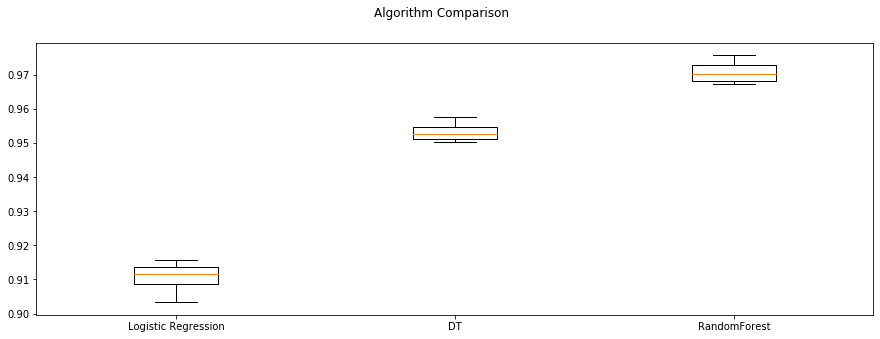

In [44]:
#boxplot algorithm comparison
fig = plt.figure(figsize=(15,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [52]:
###########################################################################################################################

###### Smoting Training data alone

In [45]:

from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2,ratio=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1333
Before OverSampling, counts of label '0': 7238 

After OverSampling, counts of label '1': 7238
After OverSampling, counts of label '0': 7238


In [46]:
X_train_res = pd.DataFrame(X_train_res,columns = X_train.columns)

##### Logistic Regression

In [104]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=.001)
lr.fit(X_train_res[rf_features], y_train_res)
y_pred_log = lr.predict(X_test[rf_features]) 
print(classification_report(y_test,pd.Series(y_pred_log)))

print("Accuracy on training set: {:.3f}".format(lr.score(X_train_res[rf_features], y_train_res)))
print("Accuracy on test set: {:.3f}".format(lr.score(X_test[rf_features], y_test)))

              precision    recall  f1-score   support

           0       0.95      0.88      0.92      3115
           1       0.53      0.76      0.63       559

    accuracy                           0.86      3674
   macro avg       0.74      0.82      0.77      3674
weighted avg       0.89      0.86      0.87      3674

Accuracy on training set: 0.815
Accuracy on test set: 0.863


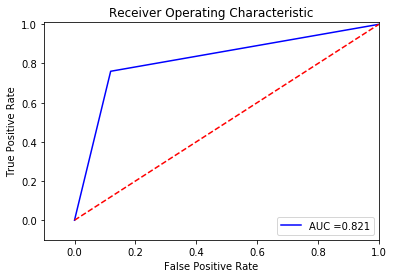

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_log)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC =%0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

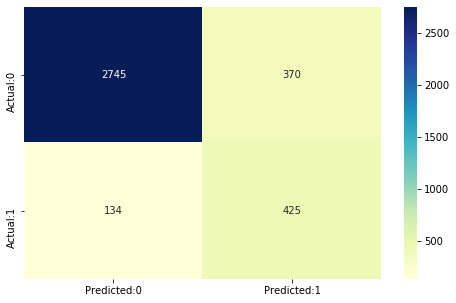

In [106]:
cm=confusion_matrix(y_test,y_pred_log)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

##### Decision Tree

In [100]:
tree = DecisionTreeClassifier(random_state=0,max_depth=10,min_samples_split=10,min_samples_leaf=1)
tree.fit(X_train_res[rf_features], y_train_res)
y_pred_decision = tree.predict(X_test[rf_features])
print(classification_report(y_test,y_pred_decision))
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_res[rf_features], y_train_res)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test[rf_features], y_test)))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3115
           1       0.56      0.76      0.65       559

    accuracy                           0.87      3674
   macro avg       0.76      0.83      0.79      3674
weighted avg       0.89      0.87      0.88      3674

Accuracy on training set: 0.930
Accuracy on test set: 0.874


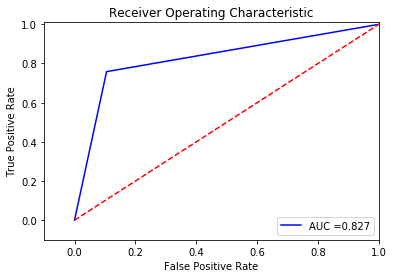

In [101]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC =%0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

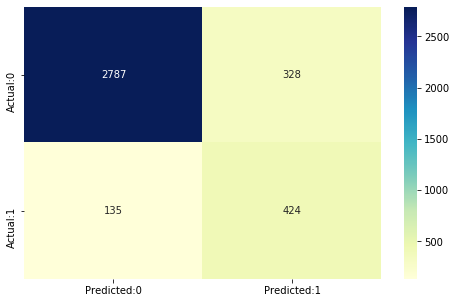

In [102]:
cm=confusion_matrix(y_test,y_pred_decision)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

##### Random Forest

In [72]:
RF=RandomForestClassifier(random_state=0)
RF.fit(X_train_res, y_train_res)
y_pred_RF = RF.predict(X_test)
print(classification_report(y_test,y_pred_RF))

print("Accuracy on training set: {:.3f}".format(RF.score(X_train_res, y_train_res)))
print("Accuracy on test set: {:.3f}".format(RF.score(X_test, y_test)))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3115
           1       0.61      0.75      0.67       559

    accuracy                           0.89      3674
   macro avg       0.78      0.83      0.80      3674
weighted avg       0.90      0.89      0.89      3674

Accuracy on training set: 1.000
Accuracy on test set: 0.889


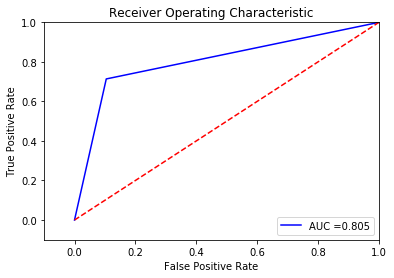

In [73]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC =%0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1, 'Confusion Matrix')

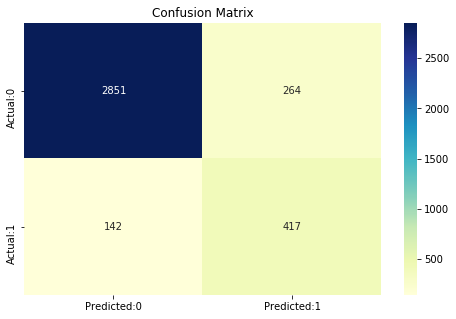

In [74]:
cm_dec=confusion_matrix(y_test,y_pred_RF)
conf_matrix=pd.DataFrame(data=cm_dec,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix")

##### Random Forest Hyper Parameter tuning

In [263]:
RF=RandomForestClassifier(random_state=0)
parameters = {'n_estimators':[300],
             'criterion':['gini'],
              'max_depth':[20,30,40],
             'min_samples_split':[2,4,6],
           'min_samples_leaf':[1,2,3]
             }
grid_search = GridSearchCV(RF,param_grid=parameters,cv=5,scoring='f1_weighted',verbose=3)
grid_search.fit(X_train_res,y_train_res)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, score=0.863, total=   5.6s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.5s remaining:    0.0s


[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, score=0.949, total=   5.8s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.3s remaining:    0.0s


[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, score=0.946, total=   5.5s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, score=0.947, total=   5.7s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=300, score=0.947, total=   6.5s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=300 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.858, total=   5.8s
[CV] criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=300 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=1, min_samples_split=4, n_estimators=300, score=0.944, total=   5.7s
[CV] criterion

[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=300, score=0.852, total=   5.9s
[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=300 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=300, score=0.938, total=   5.3s
[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=300 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=300, score=0.937, total=   5.5s
[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=300 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=300, score=0.939, total=   5.4s
[CV] criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=300 
[CV]  criterion=gini, max_depth=20, min_samples_leaf=3, min_samples_split=6, n_estimators=300, score=0.934, total=   5.4s
[CV] criterion

[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=300, score=0.939, total=   5.4s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=300 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=2, n_estimators=300, score=0.936, total=   5.3s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=300 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.854, total=   5.3s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=300 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.938, total=   5.4s
[CV] criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=300 
[CV]  criterion=gini, max_depth=30, min_samples_leaf=3, min_samples_split=4, n_estimators=300, score=0.937, total=   5.3s
[CV] criterion

[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=6, n_estimators=300, score=0.940, total=   5.6s
[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=6, n_estimators=300, score=0.941, total=   6.7s
[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=6, n_estimators=300, score=0.941, total=   5.6s
[CV] criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=2, min_samples_split=6, n_estimators=300, score=0.940, total=   5.7s
[CV] criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, n_estimators=300 
[CV]  criterion=gini, max_depth=40, min_samples_leaf=3, min_samples_split=2, n_estimators=300, score=0.854, total=   5.4s
[CV] criterion

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed: 12.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [264]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [265]:
grid_search.best_score_

0.932646841582039

In [95]:
rf_features = ["PageValues","ExitRates","Administrative"
               ,"Month","ProductRelated_Duration","ProductRelated_Duration"]

In [97]:
Random_forest=RandomForestClassifier(random_state=40,max_depth=30,min_samples_split=4,min_samples_leaf=1,n_estimators=300)
Random_forest.fit(X_train_res[rf_features], y_train_res)
y_pred_rf = Random_forest.predict(X_test[rf_features])
print(classification_report(y_test,y_pred_rf))

print("Accuracy on training set: {:.3f}".format(Random_forest.score(X_train_res[rf_features], y_train_res)))
print("Accuracy on test set: {:.3f}".format(Random_forest.score(X_test[rf_features], y_test)))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      3115
           1       0.58      0.78      0.67       559

    accuracy                           0.88      3674
   macro avg       0.77      0.84      0.80      3674
weighted avg       0.90      0.88      0.89      3674

Accuracy on training set: 0.999
Accuracy on test set: 0.881


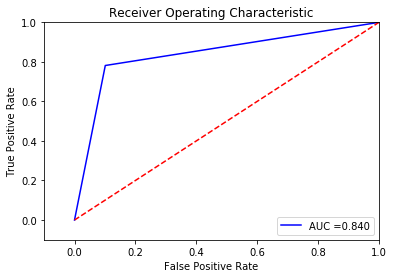

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC =%0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.0])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Text(0.5, 1, 'Confusion Matrix')

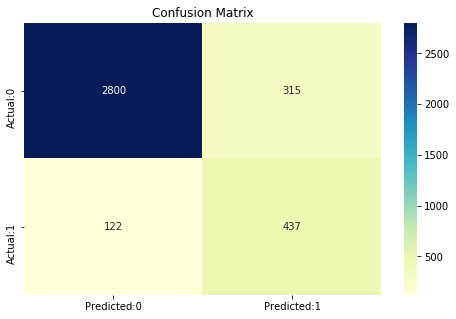

In [99]:
cm_dec=confusion_matrix(y_test,y_pred_rf)
conf_matrix=pd.DataFrame(data=cm_dec,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix")

In [453]:
######################################################################3

##### Neural Network

In [350]:
import keras
from keras.layers import Dense
from keras .models import Sequential 
from keras.layers import LSTM
from keras.layers import BatchNormalization
from keras.layers import Dropout

In [345]:
X_train_res.shape[1]

21

In [357]:
# Building a perceptron model
model = Sequential()
act = keras.layers.LeakyReLU(alpha=0.1)
model.add(Dense(256, input_shape=(X_train_res.shape[1],), activation=act))
model.add(Dense(128,activation=act))
model.add(Dense(64,activation=act))
model.add(Dense(32,activation=act))
model.add(Dense(1,activation=act))
model.compile(optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy'])

In [358]:
model.summary()

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_217 (Dense)            (None, 256)               5632      
_________________________________________________________________
dense_218 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_219 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_220 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_221 (Dense)            (None, 1)                 33        
Total params: 48,897
Trainable params: 48,897
Non-trainable params: 0
_________________________________________________________________


In [359]:
model.fit(X_train_res, y_train_res,epochs=200,batch_size=64,validation_split=0.1)

Train on 12376 samples, validate on 1376 samples
Epoch 1/200
12376/12376 [==============================] - 2s 192us/step - loss: 0.6105 - accuracy: 0.7273 - val_loss: 0.5656 - val_accuracy: 0.4440
Epoch 2/200
12376/12376 [==============================] - 2s 159us/step - loss: 0.5768 - accuracy: 0.7180 - val_loss: 0.7694 - val_accuracy: 0.4084
Epoch 3/200
12376/12376 [==============================] - 2s 162us/step - loss: 0.5750 - accuracy: 0.7607 - val_loss: 0.5728 - val_accuracy: 0.5945
Epoch 4/200
12376/12376 [==============================] - 2s 161us/step - loss: 0.4781 - accuracy: 0.7838 - val_loss: 0.4602 - val_accuracy: 0.6206
Epoch 5/200
12376/12376 [==============================] - 2s 162us/step - loss: 0.4285 - accuracy: 0.7948 - val_loss: 0.4035 - val_accuracy: 0.6926
Epoch 6/200
12376/12376 [==============================] - 2s 156us/step - loss: 0.4289 - accuracy: 0.8083 - val_loss: 0.5959 - val_accuracy: 0.6446
Epoch 7/200
12376/12376 [==============================] 

12376/12376 [==============================] - 2s 156us/step - loss: 0.3131 - accuracy: 0.8262 - val_loss: 0.2982 - val_accuracy: 0.7551
Epoch 110/200
12376/12376 [==============================] - 2s 157us/step - loss: 0.2988 - accuracy: 0.8360 - val_loss: 0.3453 - val_accuracy: 0.7885
Epoch 111/200
12376/12376 [==============================] - 2s 158us/step - loss: 0.3124 - accuracy: 0.8392 - val_loss: 0.3480 - val_accuracy: 0.7500
Epoch 112/200
12376/12376 [==============================] - 2s 160us/step - loss: 0.2880 - accuracy: 0.8413 - val_loss: 0.3037 - val_accuracy: 0.7783
Epoch 113/200
12376/12376 [==============================] - 2s 157us/step - loss: 0.2874 - accuracy: 0.8424 - val_loss: 0.3147 - val_accuracy: 0.7594
Epoch 114/200
12376/12376 [==============================] - 2s 155us/step - loss: 0.2645 - accuracy: 0.8475 - val_loss: 0.2477 - val_accuracy: 0.7951
Epoch 115/200
12376/12376 [==============================] - 2s 157us/step - loss: 0.2476 - accuracy: 0.8516

In [360]:
y_pred_nn = model.predict(X_test)

In [361]:
op = []
for x in y_pred_nn:
    if x >=0.50:
        op.append(1)
    else:
        op.append(0)

In [362]:
print(classification_report(y_test,op))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3115
           1       0.56      0.72      0.63       559

    accuracy                           0.87      3674
   macro avg       0.75      0.81      0.78      3674
weighted avg       0.89      0.87      0.88      3674



Text(0.5, 1, 'Confusion Matrix')

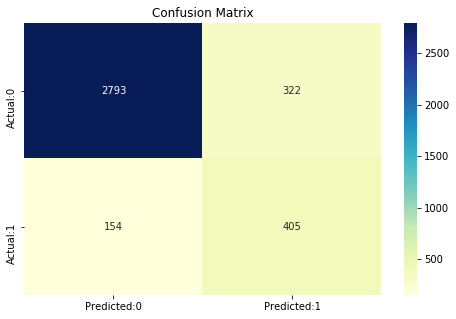

In [363]:
cm_dec=confusion_matrix(y_test,op)
conf_matrix=pd.DataFrame(data=cm_dec,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.title("Confusion Matrix")

In [330]:
cohen_kappa_score(y_test,op)

0.5637096562339332

In [206]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    model = Sequential()
    model.add(Dense(128, input_shape=(X_train_res.shape[1],), activation='relu'))
    model.add(Dense(64,activation="relu"))
    model.add(Dense(32,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(optimizer='adam',
      loss='binary_crossentropy',
      metrics=['accuracy'])
    return model
classifier = KerasClassifier(build_classifier)
parameters = {'batch_size' : [64,128],
             'epochs' : [100,200],
             'optimizer' : ['adam','rmsprop']}
grid_search = GridSearchCV(estimator=classifier,param_grid=parameters,cv = 5,scoring = 'f1_weighted')
grid_search = grid_search.fit(X_train,y_train)
print("Best Params : ",grid_search.best_params_)
print("Best Score : ", grid_search.best_score_)

Epoch 1/100
6856/6856 [==============================] - 0s 52us/step - loss: 0.3460 - accuracy: 0.8614
Epoch 2/100
6856/6856 [==============================] - 0s 31us/step - loss: 0.2659 - accuracy: 0.8943
Epoch 3/100
6856/6856 [==============================] - 0s 32us/step - loss: 0.2532 - accuracy: 0.8988
Epoch 4/100
6856/6856 [==============================] - 0s 30us/step - loss: 0.2438 - accuracy: 0.9034
Epoch 5/100
6856/6856 [==============================] - 0s 30us/step - loss: 0.2388 - accuracy: 0.9036
Epoch 6/100
6856/6856 [==============================] - 0s 30us/step - loss: 0.2357 - accuracy: 0.9064
Epoch 7/100
6856/6856 [==============================] - 0s 30us/step - loss: 0.2332 - accuracy: 0.9078
Epoch 8/100
6856/6856 [==============================] - 0s 31us/step - loss: 0.2266 - accuracy: 0.9091
Epoch 9/100
6856/6856 [==============================] - 0s 31us/step - loss: 0.2247 - accuracy: 0.9094
Epoch 10/100
6856/6856 [==============================] - 0s 32u

6856/6856 [==============================] - 0s 31us/step - loss: 0.0482 - accuracy: 0.9818
Epoch 80/100
6856/6856 [==============================] - 0s 35us/step - loss: 0.0372 - accuracy: 0.9870
Epoch 81/100
6856/6856 [==============================] - 0s 46us/step - loss: 0.0329 - accuracy: 0.9883
Epoch 82/100
6856/6856 [==============================] - 0s 44us/step - loss: 0.0301 - accuracy: 0.9918
Epoch 83/100
6856/6856 [==============================] - 0s 44us/step - loss: 0.0537 - accuracy: 0.9822
Epoch 84/100
6856/6856 [==============================] - 0s 42us/step - loss: 0.0517 - accuracy: 0.9812
Epoch 85/100
6856/6856 [==============================] - 0s 45us/step - loss: 0.0642 - accuracy: 0.9787
Epoch 86/100
6856/6856 [==============================] - 0s 45us/step - loss: 0.0373 - accuracy: 0.9873
Epoch 87/100
6856/6856 [==============================] - 0s 37us/step - loss: 0.0358 - accuracy: 0.9892
Epoch 88/100
6856/6856 [==============================] - 0s 33us/st

6857/6857 [==============================] - 0s 32us/step - loss: 0.1284 - accuracy: 0.9500
Epoch 36/100
6857/6857 [==============================] - 0s 29us/step - loss: 0.1300 - accuracy: 0.9456
Epoch 37/100
6857/6857 [==============================] - 0s 29us/step - loss: 0.1223 - accuracy: 0.9525
Epoch 38/100
6857/6857 [==============================] - 0s 29us/step - loss: 0.1191 - accuracy: 0.9544
Epoch 39/100
6857/6857 [==============================] - 0s 29us/step - loss: 0.1142 - accuracy: 0.9561
Epoch 40/100
6857/6857 [==============================] - 0s 31us/step - loss: 0.1145 - accuracy: 0.9529
Epoch 41/100
6857/6857 [==============================] - 0s 29us/step - loss: 0.1120 - accuracy: 0.9568
Epoch 42/100
6857/6857 [==============================] - 0s 31us/step - loss: 0.1096 - accuracy: 0.9567
Epoch 43/100
6857/6857 [==============================] - 0s 29us/step - loss: 0.1042 - accuracy: 0.9587
Epoch 44/100
6857/6857 [==============================] - 0s 29us/st

6857/6857 [==============================] - 0s 31us/step - loss: 0.0292 - accuracy: 0.9901
Epoch 91/100
6857/6857 [==============================] - 0s 28us/step - loss: 0.0311 - accuracy: 0.9898
Epoch 92/100
6857/6857 [==============================] - 0s 29us/step - loss: 0.0295 - accuracy: 0.9905
Epoch 93/100
6857/6857 [==============================] - 0s 28us/step - loss: 0.0326 - accuracy: 0.9886
Epoch 94/100
6857/6857 [==============================] - 0s 30us/step - loss: 0.0271 - accuracy: 0.9905
Epoch 95/100
6857/6857 [==============================] - 0s 29us/step - loss: 0.0326 - accuracy: 0.9896
Epoch 96/100
6857/6857 [==============================] - 0s 29us/step - loss: 0.0289 - accuracy: 0.9920
Epoch 97/100
6857/6857 [==============================] - 0s 30us/step - loss: 0.0400 - accuracy: 0.9850
Epoch 98/100
6857/6857 [==============================] - 0s 30us/step - loss: 0.0274 - accuracy: 0.9915
Epoch 99/100
6857/6857 [==============================] - 0s 28us/st

6856/6856 [==============================] - 0s 30us/step - loss: 0.0968 - accuracy: 0.9618
Epoch 47/100
6856/6856 [==============================] - 0s 30us/step - loss: 0.0938 - accuracy: 0.9632
Epoch 48/100
6856/6856 [==============================] - 0s 29us/step - loss: 0.0864 - accuracy: 0.9670
Epoch 49/100
6856/6856 [==============================] - 0s 30us/step - loss: 0.0825 - accuracy: 0.9694
Epoch 50/100
6856/6856 [==============================] - 0s 30us/step - loss: 0.0814 - accuracy: 0.9698
Epoch 51/100
6856/6856 [==============================] - 0s 30us/step - loss: 0.0781 - accuracy: 0.9710
Epoch 52/100
6856/6856 [==============================] - 0s 30us/step - loss: 0.0770 - accuracy: 0.9705
Epoch 53/100
6856/6856 [==============================] - 0s 30us/step - loss: 0.0709 - accuracy: 0.9768
Epoch 54/100
6856/6856 [==============================] - 0s 29us/step - loss: 0.0696 - accuracy: 0.9727
Epoch 55/100
6856/6856 [==============================] - 0s 30us/st

6857/6857 [==============================] - 0s 32us/step - loss: 0.2745 - accuracy: 0.8887
Epoch 3/100
6857/6857 [==============================] - 0s 30us/step - loss: 0.2610 - accuracy: 0.8915
Epoch 4/100
6857/6857 [==============================] - 0s 29us/step - loss: 0.2511 - accuracy: 0.8981
Epoch 5/100
6857/6857 [==============================] - 0s 30us/step - loss: 0.2442 - accuracy: 0.8985
Epoch 6/100
6857/6857 [==============================] - 0s 30us/step - loss: 0.2401 - accuracy: 0.9005
Epoch 7/100
6857/6857 [==============================] - 0s 30us/step - loss: 0.2377 - accuracy: 0.8986
Epoch 8/100
6857/6857 [==============================] - 0s 31us/step - loss: 0.2322 - accuracy: 0.9039
Epoch 9/100
6857/6857 [==============================] - 0s 30us/step - loss: 0.2278 - accuracy: 0.9061
Epoch 10/100
6857/6857 [==============================] - 0s 30us/step - loss: 0.2246 - accuracy: 0.9074
Epoch 11/100
6857/6857 [==============================] - 0s 29us/step - lo

6857/6857 [==============================] - 0s 31us/step - loss: 0.0839 - accuracy: 0.9688
Epoch 58/100
6857/6857 [==============================] - 0s 30us/step - loss: 0.0612 - accuracy: 0.9802
Epoch 59/100
6857/6857 [==============================] - 0s 30us/step - loss: 0.0600 - accuracy: 0.9793
Epoch 60/100
6857/6857 [==============================] - 0s 29us/step - loss: 0.0611 - accuracy: 0.9771
Epoch 61/100
6857/6857 [==============================] - 0s 34us/step - loss: 0.0518 - accuracy: 0.9824
Epoch 62/100
6857/6857 [==============================] - 0s 37us/step - loss: 0.0583 - accuracy: 0.9799
Epoch 63/100
6857/6857 [==============================] - 0s 38us/step - loss: 0.0699 - accuracy: 0.9749
Epoch 64/100
6857/6857 [==============================] - 0s 36us/step - loss: 0.0564 - accuracy: 0.9791
Epoch 65/100
6857/6857 [==============================] - 0s 37us/step - loss: 0.0640 - accuracy: 0.9774
Epoch 66/100
6857/6857 [==============================] - 0s 36us/st

6856/6856 [==============================] - 0s 30us/step - loss: 0.2097 - accuracy: 0.9141
Epoch 14/200
6856/6856 [==============================] - 0s 29us/step - loss: 0.2053 - accuracy: 0.9150
Epoch 15/200
6856/6856 [==============================] - 0s 30us/step - loss: 0.2048 - accuracy: 0.9158
Epoch 16/200
6856/6856 [==============================] - 0s 29us/step - loss: 0.1984 - accuracy: 0.9179
Epoch 17/200
6856/6856 [==============================] - 0s 32us/step - loss: 0.1955 - accuracy: 0.9202
Epoch 18/200
6856/6856 [==============================] - 0s 32us/step - loss: 0.1890 - accuracy: 0.9230
Epoch 19/200
6856/6856 [==============================] - 0s 34us/step - loss: 0.1865 - accuracy: 0.9252
Epoch 20/200
6856/6856 [==============================] - 0s 39us/step - loss: 0.1845 - accuracy: 0.9228
Epoch 21/200
6856/6856 [==============================] - 0s 33us/step - loss: 0.1767 - accuracy: 0.9279
Epoch 22/200
6856/6856 [==============================] - 0s 33us/st

6856/6856 [==============================] - 0s 33us/step - loss: 0.0132 - accuracy: 0.9961
Epoch 169/200
6856/6856 [==============================] - 0s 36us/step - loss: 0.0297 - accuracy: 0.9896
Epoch 170/200
6856/6856 [==============================] - 0s 36us/step - loss: 0.0290 - accuracy: 0.9898
Epoch 171/200
6856/6856 [==============================] - 0s 31us/step - loss: 0.0334 - accuracy: 0.9875
Epoch 172/200
6856/6856 [==============================] - 0s 29us/step - loss: 0.0342 - accuracy: 0.9894
Epoch 173/200
6856/6856 [==============================] - 0s 30us/step - loss: 0.0155 - accuracy: 0.9958
Epoch 174/200
6856/6856 [==============================] - 0s 29us/step - loss: 0.0133 - accuracy: 0.9959
Epoch 175/200
6856/6856 [==============================] - 0s 29us/step - loss: 0.0080 - accuracy: 0.9978
Epoch 176/200
6856/6856 [==============================] - 0s 29us/step - loss: 0.0062 - accuracy: 0.9981
Epoch 177/200
6856/6856 [==============================] - 0

6857/6857 [==============================] - 0s 35us/step - loss: 0.0202 - accuracy: 0.9947
Epoch 123/200
6857/6857 [==============================] - 0s 34us/step - loss: 0.0181 - accuracy: 0.9942
Epoch 124/200
6857/6857 [==============================] - 0s 32us/step - loss: 0.0118 - accuracy: 0.9966
Epoch 125/200
6857/6857 [==============================] - 0s 33us/step - loss: 0.0118 - accuracy: 0.9975
Epoch 126/200
6857/6857 [==============================] - 0s 33us/step - loss: 0.0112 - accuracy: 0.9961
Epoch 127/200
6857/6857 [==============================] - 0s 32us/step - loss: 0.0125 - accuracy: 0.9964
Epoch 128/200
6857/6857 [==============================] - 0s 33us/step - loss: 0.0086 - accuracy: 0.9980
Epoch 129/200
6857/6857 [==============================] - 0s 33us/step - loss: 0.0260 - accuracy: 0.9920
Epoch 130/200
6857/6857 [==============================] - 0s 33us/step - loss: 0.0325 - accuracy: 0.9902
Epoch 131/200
6857/6857 [==============================] - 0

6857/6857 [==============================] - 0s 32us/step - loss: 0.1109 - accuracy: 0.9635
Epoch 77/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0556 - accuracy: 0.9806
Epoch 78/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0528 - accuracy: 0.9825
Epoch 79/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0404 - accuracy: 0.9857
Epoch 80/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0338 - accuracy: 0.9899
Epoch 81/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0283 - accuracy: 0.9910
Epoch 82/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0286 - accuracy: 0.9908
Epoch 83/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0253 - accuracy: 0.9940
Epoch 84/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0265 - accuracy: 0.9929
Epoch 85/200
6857/6857 [==============================] - 0s 30us/st

6857/6857 [==============================] - 0s 30us/step - loss: 0.1381 - accuracy: 0.9431
Epoch 31/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.1431 - accuracy: 0.9396
Epoch 32/200
6857/6857 [==============================] - 0s 28us/step - loss: 0.1336 - accuracy: 0.9459
Epoch 33/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.1270 - accuracy: 0.9494
Epoch 34/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.1275 - accuracy: 0.9457
Epoch 35/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.1287 - accuracy: 0.9476
Epoch 36/200
6857/6857 [==============================] - 0s 28us/step - loss: 0.1182 - accuracy: 0.9532
Epoch 37/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.1201 - accuracy: 0.9520
Epoch 38/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.1110 - accuracy: 0.9545
Epoch 39/200
6857/6857 [==============================] - 0s 29us/st

6857/6857 [==============================] - 0s 29us/step - loss: 0.0177 - accuracy: 0.9946
Epoch 109/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0539 - accuracy: 0.9813
Epoch 110/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0396 - accuracy: 0.9872
Epoch 111/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0293 - accuracy: 0.9920
Epoch 112/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0288 - accuracy: 0.9924
Epoch 113/200
6857/6857 [==============================] - 0s 28us/step - loss: 0.0227 - accuracy: 0.9933
Epoch 114/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0135 - accuracy: 0.9968
Epoch 115/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0141 - accuracy: 0.9966
Epoch 116/200
6857/6857 [==============================] - 0s 27us/step - loss: 0.0130 - accuracy: 0.9971
Epoch 117/200
6857/6857 [==============================] - 0

6857/6857 [==============================] - 0s 30us/step - loss: 0.0076 - accuracy: 0.9980
Epoch 186/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0057 - accuracy: 0.9993
Epoch 187/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0045 - accuracy: 0.9993
Epoch 188/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0047 - accuracy: 0.9988
Epoch 189/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0214 - accuracy: 0.9930
Epoch 190/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.1088 - accuracy: 0.9694
Epoch 191/200
6857/6857 [==============================] - 0s 28us/step - loss: 0.0341 - accuracy: 0.9911
Epoch 192/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0188 - accuracy: 0.9959
Epoch 193/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0126 - accuracy: 0.9966
Epoch 194/200
6857/6857 [==============================] - 0

6857/6857 [==============================] - 0s 30us/step - loss: 0.0803 - accuracy: 0.9686
Epoch 64/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0780 - accuracy: 0.9717
Epoch 65/200
6857/6857 [==============================] - 0s 31us/step - loss: 0.0927 - accuracy: 0.9649
Epoch 66/200
6857/6857 [==============================] - 0s 32us/step - loss: 0.0701 - accuracy: 0.9735
Epoch 67/200
6857/6857 [==============================] - 0s 35us/step - loss: 0.0541 - accuracy: 0.9810
Epoch 68/200
6857/6857 [==============================] - 0s 35us/step - loss: 0.0483 - accuracy: 0.9829
Epoch 69/200
6857/6857 [==============================] - 0s 33us/step - loss: 0.0464 - accuracy: 0.9848
Epoch 70/200
6857/6857 [==============================] - 0s 31us/step - loss: 0.0469 - accuracy: 0.9847
Epoch 71/200
6857/6857 [==============================] - 0s 33us/step - loss: 0.0485 - accuracy: 0.9834
Epoch 72/200
6857/6857 [==============================] - 0s 35us/st

6856/6856 [==============================] - 0s 32us/step - loss: 0.1948 - accuracy: 0.9183
Epoch 18/200
6856/6856 [==============================] - 0s 30us/step - loss: 0.1907 - accuracy: 0.9205
Epoch 19/200
6856/6856 [==============================] - 0s 30us/step - loss: 0.1918 - accuracy: 0.9208
Epoch 20/200
6856/6856 [==============================] - 0s 30us/step - loss: 0.1841 - accuracy: 0.9228
Epoch 21/200
6856/6856 [==============================] - 0s 33us/step - loss: 0.1829 - accuracy: 0.9256
Epoch 22/200
6856/6856 [==============================] - 0s 32us/step - loss: 0.1830 - accuracy: 0.9253
Epoch 23/200
6856/6856 [==============================] - 0s 36us/step - loss: 0.1750 - accuracy: 0.9294
Epoch 24/200
6856/6856 [==============================] - 0s 37us/step - loss: 0.1719 - accuracy: 0.9288
Epoch 25/200
6856/6856 [==============================] - 0s 32us/step - loss: 0.1687 - accuracy: 0.9316
Epoch 26/200
6856/6856 [==============================] - 0s 30us/st

6856/6856 [==============================] - 0s 32us/step - loss: 0.0054 - accuracy: 0.9982
Epoch 171/200
6856/6856 [==============================] - 0s 29us/step - loss: 0.0057 - accuracy: 0.9990
Epoch 172/200
6856/6856 [==============================] - 0s 30us/step - loss: 0.0051 - accuracy: 0.9994
Epoch 173/200
6856/6856 [==============================] - 0s 29us/step - loss: 0.0106 - accuracy: 0.9969
Epoch 174/200
6856/6856 [==============================] - 0s 30us/step - loss: 0.0183 - accuracy: 0.9946
Epoch 175/200
6856/6856 [==============================] - 0s 29us/step - loss: 0.0479 - accuracy: 0.9845
Epoch 176/200
6856/6856 [==============================] - 0s 30us/step - loss: 0.0447 - accuracy: 0.9856
Epoch 177/200
6856/6856 [==============================] - 0s 29us/step - loss: 0.0287 - accuracy: 0.9912
Epoch 178/200
6856/6856 [==============================] - 0s 30us/step - loss: 0.0137 - accuracy: 0.9958
Epoch 179/200
6856/6856 [==============================] - 0

Epoch 48/200
6857/6857 [==============================] - 0s 31us/step - loss: 0.0911 - accuracy: 0.9672
Epoch 49/200
6857/6857 [==============================] - 0s 34us/step - loss: 0.0863 - accuracy: 0.9651
Epoch 50/200
6857/6857 [==============================] - 0s 34us/step - loss: 0.0950 - accuracy: 0.9643
Epoch 51/200
6857/6857 [==============================] - 0s 33us/step - loss: 0.0830 - accuracy: 0.9686
Epoch 52/200
6857/6857 [==============================] - 0s 35us/step - loss: 0.0795 - accuracy: 0.9717
Epoch 53/200
6857/6857 [==============================] - 0s 33us/step - loss: 0.0734 - accuracy: 0.9726
Epoch 54/200
6857/6857 [==============================] - 0s 34us/step - loss: 0.0713 - accuracy: 0.9756
Epoch 55/200
6857/6857 [==============================] - 0s 35us/step - loss: 0.0715 - accuracy: 0.9755
Epoch 56/200
6857/6857 [==============================] - 0s 43us/step - loss: 0.0762 - accuracy: 0.9733
Epoch 57/200
6857/6857 [==============================]

6857/6857 [==============================] - 0s 33us/step - loss: 0.2758 - accuracy: 0.8899
Epoch 3/200
6857/6857 [==============================] - 0s 33us/step - loss: 0.2583 - accuracy: 0.8921
Epoch 4/200
6857/6857 [==============================] - 0s 31us/step - loss: 0.2521 - accuracy: 0.8959
Epoch 5/200
6857/6857 [==============================] - 0s 33us/step - loss: 0.2441 - accuracy: 0.8972
Epoch 6/200
6857/6857 [==============================] - 0s 39us/step - loss: 0.2374 - accuracy: 0.9002
Epoch 7/200
6857/6857 [==============================] - 0s 37us/step - loss: 0.2353 - accuracy: 0.9001
Epoch 8/200
6857/6857 [==============================] - 0s 33us/step - loss: 0.2310 - accuracy: 0.9027
Epoch 9/200
6857/6857 [==============================] - 0s 32us/step - loss: 0.2249 - accuracy: 0.9045
Epoch 10/200
6857/6857 [==============================] - 0s 32us/step - loss: 0.2204 - accuracy: 0.9058
Epoch 11/200
6857/6857 [==============================] - 0s 32us/step - lo

6857/6857 [==============================] - 0s 29us/step - loss: 0.0166 - accuracy: 0.9950
Epoch 157/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0193 - accuracy: 0.9930
Epoch 158/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0181 - accuracy: 0.9946
Epoch 159/200
6857/6857 [==============================] - 0s 35us/step - loss: 0.0154 - accuracy: 0.9942
Epoch 160/200
6857/6857 [==============================] - 0s 36us/step - loss: 0.0148 - accuracy: 0.9955
Epoch 161/200
6857/6857 [==============================] - 0s 36us/step - loss: 0.0197 - accuracy: 0.9939
Epoch 162/200
6857/6857 [==============================] - 0s 35us/step - loss: 0.0262 - accuracy: 0.9899
Epoch 163/200
6857/6857 [==============================] - 0s 37us/step - loss: 0.0344 - accuracy: 0.9892
Epoch 164/200
6857/6857 [==============================] - 0s 35us/step - loss: 0.0223 - accuracy: 0.9926
Epoch 165/200
6857/6857 [==============================] - 0

6857/6857 [==============================] - 0s 36us/step - loss: 0.0325 - accuracy: 0.9895
Epoch 111/200
6857/6857 [==============================] - 0s 35us/step - loss: 0.0413 - accuracy: 0.9876
Epoch 112/200
6857/6857 [==============================] - 0s 35us/step - loss: 0.0323 - accuracy: 0.9869
Epoch 113/200
6857/6857 [==============================] - 0s 35us/step - loss: 0.0341 - accuracy: 0.9888
Epoch 114/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0335 - accuracy: 0.9880
Epoch 115/200
6857/6857 [==============================] - 0s 31us/step - loss: 0.0280 - accuracy: 0.9905
Epoch 116/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0138 - accuracy: 0.9966
Epoch 117/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0101 - accuracy: 0.9974
Epoch 118/200
6857/6857 [==============================] - 0s 30us/step - loss: 0.0114 - accuracy: 0.9977
Epoch 119/200
6857/6857 [==============================] - 0

6857/6857 [==============================] - 0s 35us/step - loss: 0.0102 - accuracy: 0.9969
Epoch 188/200
6857/6857 [==============================] - 0s 35us/step - loss: 0.0228 - accuracy: 0.9937
Epoch 189/200
6857/6857 [==============================] - 0s 34us/step - loss: 0.0143 - accuracy: 0.9959
Epoch 190/200
6857/6857 [==============================] - 0s 36us/step - loss: 0.0108 - accuracy: 0.9972
Epoch 191/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0125 - accuracy: 0.9965
Epoch 192/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0051 - accuracy: 0.9990
Epoch 193/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0041 - accuracy: 0.9990
Epoch 194/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0041 - accuracy: 0.9994
Epoch 195/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0100 - accuracy: 0.9978
Epoch 196/200
6857/6857 [==============================] - 0

6857/6857 [==============================] - 0s 30us/step - loss: 0.0515 - accuracy: 0.9838
Epoch 66/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0526 - accuracy: 0.9834
Epoch 67/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0527 - accuracy: 0.9822
Epoch 68/200
6857/6857 [==============================] - 0s 33us/step - loss: 0.0486 - accuracy: 0.9821
Epoch 69/200
6857/6857 [==============================] - 0s 34us/step - loss: 0.0503 - accuracy: 0.9845
Epoch 70/200
6857/6857 [==============================] - 0s 35us/step - loss: 0.0480 - accuracy: 0.9832 0s - loss: 0.0535 - accuracy
Epoch 71/200
6857/6857 [==============================] - 0s 38us/step - loss: 0.0414 - accuracy: 0.9873
Epoch 72/200
6857/6857 [==============================] - 0s 32us/step - loss: 0.0414 - accuracy: 0.9869
Epoch 73/200
6857/6857 [==============================] - 0s 29us/step - loss: 0.0399 - accuracy: 0.9869
Epoch 74/200
6857/6857 [===============

6856/6856 [==============================] - 0s 20us/step - loss: 0.1961 - accuracy: 0.9186
Epoch 20/100
6856/6856 [==============================] - 0s 18us/step - loss: 0.1931 - accuracy: 0.9201
Epoch 21/100
6856/6856 [==============================] - 0s 17us/step - loss: 0.1907 - accuracy: 0.9220
Epoch 22/100
6856/6856 [==============================] - 0s 18us/step - loss: 0.1879 - accuracy: 0.9247
Epoch 23/100
6856/6856 [==============================] - 0s 17us/step - loss: 0.1838 - accuracy: 0.9265
Epoch 24/100
6856/6856 [==============================] - 0s 18us/step - loss: 0.1769 - accuracy: 0.9296
Epoch 25/100
6856/6856 [==============================] - 0s 17us/step - loss: 0.1769 - accuracy: 0.9281
Epoch 26/100
6856/6856 [==============================] - 0s 18us/step - loss: 0.1709 - accuracy: 0.9319
Epoch 27/100
6856/6856 [==============================] - 0s 18us/step - loss: 0.1712 - accuracy: 0.9310
Epoch 28/100
6856/6856 [==============================] - 0s 19us/st

6857/6857 [==============================] - 0s 21us/step - loss: 0.0620 - accuracy: 0.9783
Epoch 76/100
6857/6857 [==============================] - 0s 19us/step - loss: 0.0648 - accuracy: 0.9767
Epoch 77/100
6857/6857 [==============================] - 0s 20us/step - loss: 0.0597 - accuracy: 0.9777
Epoch 78/100
6857/6857 [==============================] - 0s 20us/step - loss: 0.0574 - accuracy: 0.9800
Epoch 79/100
6857/6857 [==============================] - 0s 19us/step - loss: 0.0547 - accuracy: 0.9818
Epoch 80/100
6857/6857 [==============================] - 0s 20us/step - loss: 0.0634 - accuracy: 0.9752
Epoch 81/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.0593 - accuracy: 0.9771
Epoch 82/100
6857/6857 [==============================] - 0s 17us/step - loss: 0.0567 - accuracy: 0.9772
Epoch 83/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.0584 - accuracy: 0.9793
Epoch 84/100
6857/6857 [==============================] - 0s 17us/st

6857/6857 [==============================] - 0s 17us/step - loss: 0.1023 - accuracy: 0.9619
Epoch 53/100
6857/6857 [==============================] - 0s 20us/step - loss: 0.1023 - accuracy: 0.9608
Epoch 54/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.1052 - accuracy: 0.9590
Epoch 55/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.0997 - accuracy: 0.9618
Epoch 56/100
6857/6857 [==============================] - 0s 20us/step - loss: 0.0923 - accuracy: 0.9672
Epoch 57/100
6857/6857 [==============================] - 0s 20us/step - loss: 0.0935 - accuracy: 0.9656
Epoch 58/100
6857/6857 [==============================] - 0s 22us/step - loss: 0.0930 - accuracy: 0.9660
Epoch 59/100
6857/6857 [==============================] - 0s 21us/step - loss: 0.0897 - accuracy: 0.9697
Epoch 60/100
6857/6857 [==============================] - 0s 19us/step - loss: 0.0925 - accuracy: 0.9662
Epoch 61/100
6857/6857 [==============================] - 0s 20us/st

6857/6857 [==============================] - 0s 18us/step - loss: 0.2375 - accuracy: 0.9029
Epoch 7/100
6857/6857 [==============================] - 0s 24us/step - loss: 0.2314 - accuracy: 0.9061
Epoch 8/100
6857/6857 [==============================] - 0s 19us/step - loss: 0.2286 - accuracy: 0.9039
Epoch 9/100
6857/6857 [==============================] - 0s 19us/step - loss: 0.2229 - accuracy: 0.9056
Epoch 10/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.2205 - accuracy: 0.9084
Epoch 11/100
6857/6857 [==============================] - 0s 19us/step - loss: 0.2175 - accuracy: 0.9075
Epoch 12/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.2146 - accuracy: 0.9084
Epoch 13/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.2124 - accuracy: 0.9097
Epoch 14/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.2059 - accuracy: 0.9132
Epoch 15/100
6857/6857 [==============================] - 0s 22us/step 

6856/6856 [==============================] - 0s 18us/step - loss: 0.0818 - accuracy: 0.9702
Epoch 62/100
6856/6856 [==============================] - 0s 18us/step - loss: 0.0899 - accuracy: 0.9641
Epoch 63/100
6856/6856 [==============================] - 0s 18us/step - loss: 0.0775 - accuracy: 0.9714 0s - loss: 0.0780 - accuracy: 0.97
Epoch 64/100
6856/6856 [==============================] - 0s 18us/step - loss: 0.0866 - accuracy: 0.9686
Epoch 65/100
6856/6856 [==============================] - 0s 23us/step - loss: 0.0754 - accuracy: 0.9727
Epoch 66/100
6856/6856 [==============================] - 0s 21us/step - loss: 0.0737 - accuracy: 0.9742
Epoch 67/100
6856/6856 [==============================] - 0s 20us/step - loss: 0.0678 - accuracy: 0.9745
Epoch 68/100
6856/6856 [==============================] - 0s 20us/step - loss: 0.0692 - accuracy: 0.9739
Epoch 69/100
6856/6856 [==============================] - 0s 23us/step - loss: 0.0663 - accuracy: 0.9755
Epoch 70/100
6856/6856 [=========

6857/6857 [==============================] - 0s 18us/step - loss: 0.2166 - accuracy: 0.9107
Epoch 17/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.2124 - accuracy: 0.9096
Epoch 18/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.2093 - accuracy: 0.9121
Epoch 19/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.2082 - accuracy: 0.9151
Epoch 20/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.2016 - accuracy: 0.9154
Epoch 21/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.1966 - accuracy: 0.9183
Epoch 22/100
6857/6857 [==============================] - 0s 19us/step - loss: 0.1947 - accuracy: 0.9192
Epoch 23/100
6857/6857 [==============================] - 0s 19us/step - loss: 0.1919 - accuracy: 0.9211
Epoch 24/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.1880 - accuracy: 0.9220
Epoch 25/100
6857/6857 [==============================] - 0s 18us/st

6857/6857 [==============================] - 0s 17us/step - loss: 0.0531 - accuracy: 0.9819
Epoch 72/100
6857/6857 [==============================] - 0s 17us/step - loss: 0.0475 - accuracy: 0.9853
Epoch 73/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.0444 - accuracy: 0.9866
Epoch 74/100
6857/6857 [==============================] - 0s 17us/step - loss: 0.0431 - accuracy: 0.9847
Epoch 75/100
6857/6857 [==============================] - ETA: 0s - loss: 0.0412 - accuracy: 0.98 - 0s 18us/step - loss: 0.0432 - accuracy: 0.9866
Epoch 76/100
6857/6857 [==============================] - 0s 17us/step - loss: 0.0456 - accuracy: 0.9853
Epoch 77/100
6857/6857 [==============================] - 0s 17us/step - loss: 0.0425 - accuracy: 0.9866
Epoch 78/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.0433 - accuracy: 0.9850
Epoch 79/100
6857/6857 [==============================] - 0s 18us/step - loss: 0.0410 - accuracy: 0.9883
Epoch 80/100
6857/6857 [==

6856/6856 [==============================] - 0s 21us/step - loss: 0.1779 - accuracy: 0.9296
Epoch 27/200
6856/6856 [==============================] - 0s 21us/step - loss: 0.1783 - accuracy: 0.9288
Epoch 28/200
6856/6856 [==============================] - 0s 21us/step - loss: 0.1715 - accuracy: 0.9297
Epoch 29/200
6856/6856 [==============================] - 0s 21us/step - loss: 0.1699 - accuracy: 0.9307
Epoch 30/200
6856/6856 [==============================] - 0s 21us/step - loss: 0.1660 - accuracy: 0.9345
Epoch 31/200
6856/6856 [==============================] - 0s 21us/step - loss: 0.1668 - accuracy: 0.9293
Epoch 32/200
6856/6856 [==============================] - 0s 20us/step - loss: 0.1588 - accuracy: 0.9374
Epoch 33/200
6856/6856 [==============================] - 0s 19us/step - loss: 0.1566 - accuracy: 0.9379
Epoch 34/200
6856/6856 [==============================] - 0s 18us/step - loss: 0.1543 - accuracy: 0.9392
Epoch 35/200
6856/6856 [==============================] - 0s 18us/st

6856/6856 [==============================] - 0s 18us/step - loss: 0.0093 - accuracy: 0.9984
Epoch 181/200
6856/6856 [==============================] - 0s 18us/step - loss: 0.0054 - accuracy: 0.9990
Epoch 182/200
6856/6856 [==============================] - 0s 18us/step - loss: 0.0268 - accuracy: 0.9912
Epoch 183/200
6856/6856 [==============================] - 0s 18us/step - loss: 0.0890 - accuracy: 0.9756
Epoch 184/200
6856/6856 [==============================] - 0s 18us/step - loss: 0.0831 - accuracy: 0.9772
Epoch 185/200
6856/6856 [==============================] - 0s 19us/step - loss: 0.0391 - accuracy: 0.9879
Epoch 186/200
6856/6856 [==============================] - 0s 19us/step - loss: 0.0201 - accuracy: 0.9950
Epoch 187/200
6856/6856 [==============================] - 0s 18us/step - loss: 0.0151 - accuracy: 0.9952
Epoch 188/200
6856/6856 [==============================] - 0s 18us/step - loss: 0.0113 - accuracy: 0.9977
Epoch 189/200
6856/6856 [==============================] - 0

6857/6857 [==============================] - 0s 17us/step - loss: 0.0773 - accuracy: 0.9730
Epoch 59/200
6857/6857 [==============================] - 0s 17us/step - loss: 0.0729 - accuracy: 0.9733
Epoch 60/200
6857/6857 [==============================] - 0s 17us/step - loss: 0.0736 - accuracy: 0.9724
Epoch 61/200
6857/6857 [==============================] - 0s 17us/step - loss: 0.0686 - accuracy: 0.9754
Epoch 62/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0689 - accuracy: 0.9764
Epoch 63/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0668 - accuracy: 0.9761
Epoch 64/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0693 - accuracy: 0.9739
Epoch 65/200
6857/6857 [==============================] - 0s 20us/step - loss: 0.0660 - accuracy: 0.9756
Epoch 66/200
6857/6857 [==============================] - 0s 21us/step - loss: 0.0671 - accuracy: 0.9754
Epoch 67/200
6857/6857 [==============================] - 0s 19us/st

6857/6857 [==============================] - 0s 19us/step - loss: 0.2235 - accuracy: 0.9087
Epoch 13/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.2195 - accuracy: 0.9093
Epoch 14/200
6857/6857 [==============================] - 0s 17us/step - loss: 0.2189 - accuracy: 0.9089
Epoch 15/200
6857/6857 [==============================] - 0s 17us/step - loss: 0.2131 - accuracy: 0.9118
Epoch 16/200
6857/6857 [==============================] - 0s 17us/step - loss: 0.2109 - accuracy: 0.9126
Epoch 17/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.2053 - accuracy: 0.9163
Epoch 18/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.2015 - accuracy: 0.9172
Epoch 19/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.2040 - accuracy: 0.9148
Epoch 20/200
6857/6857 [==============================] - 0s 17us/step - loss: 0.1983 - accuracy: 0.9182
Epoch 21/200
6857/6857 [==============================] - 0s 17us/st

6857/6857 [==============================] - 0s 18us/step - loss: 0.0174 - accuracy: 0.9937
Epoch 168/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.0211 - accuracy: 0.9933
Epoch 169/200
6857/6857 [==============================] - 0s 20us/step - loss: 0.0249 - accuracy: 0.9927
Epoch 170/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0299 - accuracy: 0.9908
Epoch 171/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0599 - accuracy: 0.9786
Epoch 172/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0272 - accuracy: 0.9895
Epoch 173/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0270 - accuracy: 0.9929
Epoch 174/200
6857/6857 [==============================] - 0s 17us/step - loss: 0.0354 - accuracy: 0.9907
Epoch 175/200
6857/6857 [==============================] - 0s 17us/step - loss: 0.0249 - accuracy: 0.9927
Epoch 176/200
6857/6857 [==============================] - 0

6857/6857 [==============================] - 0s 18us/step - loss: 0.0309 - accuracy: 0.9911
Epoch 122/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.0291 - accuracy: 0.9899
Epoch 123/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.0294 - accuracy: 0.9912
Epoch 124/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0269 - accuracy: 0.9927
Epoch 125/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.0177 - accuracy: 0.9955
Epoch 126/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0264 - accuracy: 0.9921
Epoch 127/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0352 - accuracy: 0.9899
Epoch 128/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0377 - accuracy: 0.9886
Epoch 129/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0284 - accuracy: 0.9907
Epoch 130/200
6857/6857 [==============================] - 0

6857/6857 [==============================] - 0s 18us/step - loss: 0.0053 - accuracy: 0.9993
Epoch 199/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0053 - accuracy: 0.9990
Epoch 200/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0063 - accuracy: 0.9987 0s - loss: 0.0049 - accuracy: 0.
Epoch 1/200
6857/6857 [==============================] - 0s 39us/step - loss: 0.3727 - accuracy: 0.8617
Epoch 2/200
6857/6857 [==============================] - 0s 17us/step - loss: 0.2763 - accuracy: 0.8924
Epoch 3/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.2598 - accuracy: 0.8963
Epoch 4/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.2484 - accuracy: 0.9019
Epoch 5/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.2433 - accuracy: 0.9040
Epoch 6/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.2365 - accuracy: 0.9051
Epoch 7/200
6857/6857 [================

6857/6857 [==============================] - 0s 18us/step - loss: 0.0103 - accuracy: 0.9984
Epoch 153/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0102 - accuracy: 0.9981
Epoch 154/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0105 - accuracy: 0.9980
Epoch 155/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0131 - accuracy: 0.9968
Epoch 156/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0108 - accuracy: 0.9977
Epoch 157/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0181 - accuracy: 0.9947
Epoch 158/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0166 - accuracy: 0.9947
Epoch 159/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.0104 - accuracy: 0.9982
Epoch 160/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0109 - accuracy: 0.9972
Epoch 161/200
6857/6857 [==============================] - 0

6856/6856 [==============================] - 0s 21us/step - loss: 0.0389 - accuracy: 0.9864
Epoch 106/200
6856/6856 [==============================] - 0s 21us/step - loss: 0.0531 - accuracy: 0.9825
Epoch 107/200
6856/6856 [==============================] - 0s 22us/step - loss: 0.0577 - accuracy: 0.9815
Epoch 108/200
6856/6856 [==============================] - 0s 20us/step - loss: 0.0530 - accuracy: 0.9835
Epoch 109/200
6856/6856 [==============================] - 0s 18us/step - loss: 0.0301 - accuracy: 0.9904
Epoch 110/200
6856/6856 [==============================] - 0s 18us/step - loss: 0.0337 - accuracy: 0.9920
Epoch 111/200
6856/6856 [==============================] - 0s 21us/step - loss: 0.0280 - accuracy: 0.9912
Epoch 112/200
6856/6856 [==============================] - 0s 19us/step - loss: 0.0261 - accuracy: 0.9931
Epoch 113/200
6856/6856 [==============================] - 0s 19us/step - loss: 0.0267 - accuracy: 0.9931
Epoch 114/200
6856/6856 [==============================] - 0

6857/6857 [==============================] - 0s 18us/step - loss: 0.0902 - accuracy: 0.9682
Epoch 60/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0885 - accuracy: 0.9672
Epoch 61/200
6857/6857 [==============================] - 0s 17us/step - loss: 0.0820 - accuracy: 0.9713
Epoch 62/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0851 - accuracy: 0.9686
Epoch 63/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0871 - accuracy: 0.9694
Epoch 64/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0871 - accuracy: 0.9678
Epoch 65/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0740 - accuracy: 0.9743
Epoch 66/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0707 - accuracy: 0.9749
Epoch 67/200
6857/6857 [==============================] - 0s 20us/step - loss: 0.0762 - accuracy: 0.9721
Epoch 68/200
6857/6857 [==============================] - 0s 18us/st

6857/6857 [==============================] - 0s 19us/step - loss: 0.2261 - accuracy: 0.9055
Epoch 13/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.2257 - accuracy: 0.9056
Epoch 14/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.2221 - accuracy: 0.9065
Epoch 15/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.2168 - accuracy: 0.9080
Epoch 16/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.2171 - accuracy: 0.9091
Epoch 17/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.2138 - accuracy: 0.9116
Epoch 18/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.2088 - accuracy: 0.9137
Epoch 19/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.2041 - accuracy: 0.9145
Epoch 20/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.2038 - accuracy: 0.9163
Epoch 21/200
6857/6857 [==============================] - 0s 18us/st

6857/6857 [==============================] - 0s 18us/step - loss: 0.0063 - accuracy: 0.9987
Epoch 167/200
6857/6857 [==============================] - 0s 20us/step - loss: 0.0061 - accuracy: 0.9984
Epoch 168/200
6857/6857 [==============================] - 0s 22us/step - loss: 0.0055 - accuracy: 0.9991
Epoch 169/200
6857/6857 [==============================] - 0s 22us/step - loss: 0.0068 - accuracy: 0.9985
Epoch 170/200
6857/6857 [==============================] - 0s 21us/step - loss: 0.0058 - accuracy: 0.9987
Epoch 171/200
6857/6857 [==============================] - 0s 21us/step - loss: 0.0058 - accuracy: 0.9990
Epoch 172/200
6857/6857 [==============================] - 0s 21us/step - loss: 0.0066 - accuracy: 0.9985
Epoch 173/200
6857/6857 [==============================] - 0s 21us/step - loss: 0.0155 - accuracy: 0.9947
Epoch 174/200
6857/6857 [==============================] - 0s 21us/step - loss: 0.0347 - accuracy: 0.9904
Epoch 175/200
6857/6857 [==============================] - 0

Epoch 121/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0147 - accuracy: 0.9965 0s - loss: 0.0149 - accuracy: 0.
Epoch 122/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0181 - accuracy: 0.9952
Epoch 123/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0160 - accuracy: 0.9959
Epoch 124/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0125 - accuracy: 0.9965
Epoch 125/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0130 - accuracy: 0.9972
Epoch 126/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0106 - accuracy: 0.9985
Epoch 127/200
6857/6857 [==============================] - 0s 22us/step - loss: 0.0125 - accuracy: 0.9975
Epoch 128/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0126 - accuracy: 0.9971
Epoch 129/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0119 - accuracy: 0.9980
Epoch 130/200

6857/6857 [==============================] - 0s 19us/step - loss: 0.0600 - accuracy: 0.9797
Epoch 76/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.0656 - accuracy: 0.9783
Epoch 77/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.0559 - accuracy: 0.9818
Epoch 78/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.0460 - accuracy: 0.9853
Epoch 79/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.0425 - accuracy: 0.9873
Epoch 80/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.0394 - accuracy: 0.9875
Epoch 81/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.0313 - accuracy: 0.9910
Epoch 82/200
6857/6857 [==============================] - 0s 18us/step - loss: 0.0333 - accuracy: 0.9895
Epoch 83/200
6857/6857 [==============================] - 0s 19us/step - loss: 0.0361 - accuracy: 0.9876
Epoch 84/200
6857/6857 [==============================] - 0s 19us/st

8571/8571 [==============================] - 0s 36us/step - loss: 0.1512 - accuracy: 0.9362 0s - loss: 0.1484 - accuracy
Epoch 30/100
8571/8571 [==============================] - 0s 31us/step - loss: 0.1462 - accuracy: 0.9397
Epoch 31/100
8571/8571 [==============================] - 0s 30us/step - loss: 0.1450 - accuracy: 0.9417
Epoch 32/100
8571/8571 [==============================] - 0s 30us/step - loss: 0.1444 - accuracy: 0.9415
Epoch 33/100
8571/8571 [==============================] - 0s 30us/step - loss: 0.1374 - accuracy: 0.9418
Epoch 34/100
8571/8571 [==============================] - 0s 30us/step - loss: 0.1323 - accuracy: 0.9462
Epoch 35/100
8571/8571 [==============================] - 0s 30us/step - loss: 0.1292 - accuracy: 0.9482
Epoch 36/100
8571/8571 [==============================] - 0s 32us/step - loss: 0.1228 - accuracy: 0.9501
Epoch 37/100
8571/8571 [==============================] - 0s 30us/step - loss: 0.1247 - accuracy: 0.9501
Epoch 38/100
8571/8571 [===============